# **Q1**
Implement linear regression (LR) approach using batch gradient descent (BGD),
stochastic gradient descent (SGD), and mini-batch gradient descent (MBGD)
algorithms. Show the cost-function vs. epoch plots for LR with BGD, LR with SGD,
and LR with MBGD models. Show the contour plots for cost function vs. w1 vs. w2
evaluated using LR with BGD, LR with SGD, and LR with MBGD models. For Q1,
the data-q1.xlsx file must be used. The data q1.xlsx file contains two inputs and one
output. You can consider w1 and w2 are the weight values of features.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def norm1(x):
  return (x-np.mean(x,axis=0))/np.std(x,axis=0)
def norm2(x):
  return x/np.max(x,axis=0)
def hyp(x,w):
  return np.dot(x,w)

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving data_q1.xlsx to data_q1.xlsx


In [ ]:
q1data=pd.read_excel("/content/data_q1.xlsx")

In [ ]:
f,m = 3,115 # features, instances
data=q1data.apply(norm1)
data.insert(0,"x0",1)
data=np.array(data)
x,y=data[:,:f],data[:,f].reshape(m,1)

## LR WITH BGD

In [ ]:
alpha,T= 0.1,300 # learning rate, total iterations
w=np.random.rand(f).reshape(f,1) # weight vector initialised
w1_rec = [] ; w2_rec = []
iter=np.arange(1,T+1)
cost=[] # cost function list

In [ ]:
for t in range(T):
  j1=hyp(x,w)-y
  for j in range(f):
    j2 = np.multiply(j1,x[:,j].reshape(m,1))
    jsum = np.sum(j2)
    w[j] = w[j] - (1/m)*alpha*jsum
    if j==1:
      w1_rec.append(float(w[j]))
    elif j==2:
      w2_rec.append(float(w[j]))
  cost_sum = np.sum(np.square(j1))
  cost_fun = 1/(2*m)*cost_sum
  cost.append(cost_fun)

Text(0, 0.5, 'Cost Function (J)')

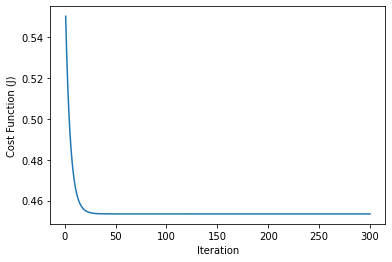

In [ ]:
# J vs t
plt.plot(iter,cost)
plt.xlabel("Iteration")
plt.ylabel("Cost Function (J)")

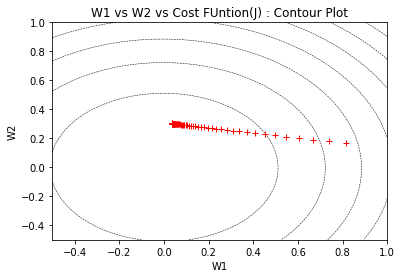

In [ ]:
## CONTOUR PLOT
w1=np.linspace(-0.5,1,250)
w2=np.linspace(-0.5,1,250)

J=np.zeros((250,250))
w_vector=np.zeros((3,1))

for x in range(len(w1)):
  for y in range(len(w2)):
    w_vector[1]=w1[x]
    w_vector[2]=w2[y]
    y_predicted=np.dot(data[:,:3],w_vector)**2
    squared_errors=(y_predicted-data[:,3].reshape(m,1))
    sum_squared_errors=(0.1/500)*np.sum(squared_errors)
    J[x][y]=sum_squared_errors

plt.contour(w1,w2,J, colors='black',linestyles='dashed',linewidths=0.5)
plt.title("W1 vs W2 vs Cost FUntion(J) : Contour Plot") ; plt.xlabel('W1') ; plt.ylabel('W2')
plt.plot(w1_rec,w2_rec,'r+')

## LR WITH SGD

In [ ]:
T=4000 # total iterations
w=np.random.rand(f) # weight vector initialised
w1_rec = [] ; w2_rec = []
iter=np.arange(1,T+1)
cost=[] # cost function list

In [ ]:
for t in range(T):
  np.random.shuffle(data)
  index=np.random.randint(114)
  j1 = hyp(x,w)[index]-y[index] # (hyp(xi)-yi)
  for j in range(f):
    j2 = np.multiply(j1,x[index,j])
    w[j] = w[j] - alpha*j2
    if j==1:
      w1_rec.append(float(w[j]))
    elif j==2:
      w2_rec.append(float(w[j]))
  cost_sum = np.sum(np.square(j1))
  cost_fun = 1/(2*m)*cost_sum
  cost.append(cost_fun)

Text(0, 0.5, 'Cost Function (J)')

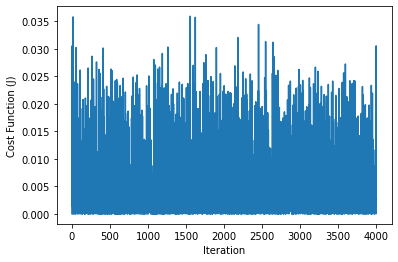

In [ ]:
# J vs t
plt.plot(iter,cost)
plt.xlabel("Iteration")
plt.ylabel("Cost Function (J)")

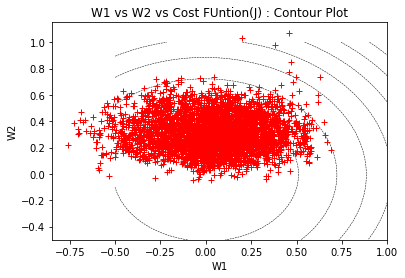

In [ ]:
## CONTOUR PLOT
w1=np.linspace(-0.5,1,250)
w2=np.linspace(-0.5,1,250)

J=np.zeros((250,250))
w_vector=np.zeros((3,1))

for x in range(len(w1)):
  for y in range(len(w2)):
    w_vector[1]=w1[x]
    w_vector[2]=w2[y]
    y_predicted=np.dot(data[:,:3],w_vector)**2
    squared_errors=(y_predicted-data[:,3].reshape(m,1))
    sum_squared_errors=(0.1/500)*np.sum(squared_errors)
    J[x][y]=sum_squared_errors

plt.contour(w1,w2,J, colors='black',linestyles='dashed',linewidths=0.5)
plt.title("W1 vs W2 vs Cost FUntion(J) : Contour Plot") ; plt.xlabel('W1') ; plt.ylabel('W2')
plt.plot(w1_rec,w2_rec,'r+')

## LR WITH MBGD

In [ ]:
T=5000 # total iterations
nb=50
w=np.random.rand(f) # weight vector initialised
w1_rec = [] ; w2_rec = []
iter=np.arange(1,T+1)
cost=[] # cost function list

In [ ]:
for t in range(T):
  np.random.shuffle(data)
  hyp = np.dot(data[:nb,:3],w.reshape(f,1)) # hypothesis array
  j1 = np.subtract(hyp,data[:nb,3].reshape(nb,1)) # (hyp(xi)-yi)
  for j in range(f):
    j2 = np.multiply(j1,data[:nb,j].reshape(nb,1))
    jsum = np.sum(j2)
    w[j] = w[j] - (1/m)*alpha*jsum
    if j==1:
      w1_rec.append(float(w[j]))
    elif j==2:
      w2_rec.append(float(w[j]))
  cost_sum = np.sum(np.square(j1))
  cost_fun = 1/(2*m)*cost_sum
  cost.append(cost_fun)

Text(0, 0.5, 'Cost Function (J)')

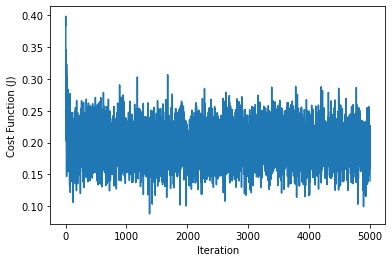

In [ ]:
# J vs t
plt.plot(iter,cost)
plt.xlabel("Iteration")
plt.ylabel("Cost Function (J)")

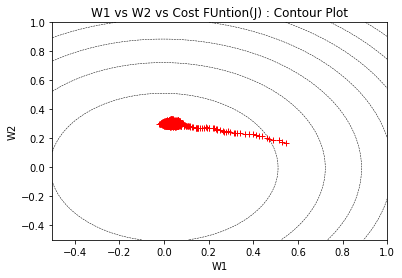

In [ ]:
## CONTOUR PLOT
w1=np.linspace(-0.5,1,250)
w2=np.linspace(-0.5,1,250)

J=np.zeros((250,250))
w_vector=np.zeros((3,1))

for x in range(len(w1)):
  for y in range(len(w2)):
    w_vector[1]=w1[x]
    w_vector[2]=w2[y]
    y_predicted=np.dot(data[:,:3],w_vector)**2
    squared_errors=(y_predicted-data[:,3].reshape(m,1))
    sum_squared_errors=(0.1/500)*np.sum(squared_errors)
    J[x][y]=sum_squared_errors

plt.contour(w1,w2,J, colors='black',linestyles='dashed',linewidths=0.5)
plt.title("W1 vs W2 vs Cost FUntion(J) : Contour Plot") ; plt.xlabel('W1') ; plt.ylabel('W2')
plt.plot(w1_rec,w2_rec,'r+')